# NLP 기초 Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [4]:
spam.columns

Index(['v1', 'v2'], dtype='object')

In [5]:
spam.isnull().sum() # 결측치는 없다.

v1    0
v2    0
dtype: int64

In [6]:
spam['v1'].value_counts() #spam의 비율이 더적은 불균형한 라벨을 갖고있다.

ham     4825
spam     747
Name: v1, dtype: int64

## Tokenizing


In [7]:
import nltk

In [8]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [20]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import re

stop_words = set(stopwords.words('english')) 

ssss =spam.copy()
result = []

FILTERS = "([~,!?\"':.;|~)^(])" 
CHANGE_FILTER = re.compile(FILTERS)

FILTERS2 = '[-=.#/?:$}]'
CHANGE_FILTER2 = re.compile(FILTERS2)



for i in ssss['v2'] :
    
    i = CHANGE_FILTER.sub("", i)
    i = CHANGE_FILTER2.sub("", i)
    
    words = word_tokenize(i)
    
    result.append([word for word in words if word not in stop_words])
    
ssss['v2'] = result


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
ssss.head()

,v1,v2
0,ham,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,"[Ok, lar, Joking, wif, u, oni]"
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"[Nah, I, dont, think, goes, usf, lives, around..."


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText, EMlo가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [25]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=ssss['v2'],  window=5, min_count=5, vector_size=4, workers=4, sg=0)
#sg=0 는 cbow 1은 skipgram

In [26]:
model_result = model.wv.most_similar("true")
print(model_result)


[('actually', 0.9997414350509644), ('txt', 0.9997090697288513), ('today', 0.9996040463447571), ('Is', 0.9995466470718384), ('days', 0.9994710087776184), ('minute', 0.9993941187858582), ('friends', 0.9993910789489746), ('Free', 0.9993627071380615), ('Dear', 0.9992671608924866), ('something', 0.9991310238838196)]


In [27]:
model = Word2Vec(sentences=ssss['v2'],  window=5, min_count=5,vector_size=4, workers=4, sg=1)
#sg=0 는 cbow 1은 skipgram

In [28]:
model_result = model.wv.most_similar("true")
print(model_result)


[('friend', 0.9997698664665222), ('set', 0.9996989369392395), ('checking', 0.9996618032455444), ('Yo', 0.9994832277297974), ('AGE', 0.9993095397949219), ('charges', 0.9992373585700989), ('Sad', 0.9991524815559387), ('following', 0.999055027961731), ('Really', 0.9989524483680725), ('Read', 0.9986708760261536)]


## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

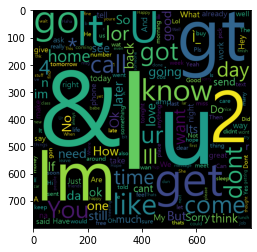

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
#ham
kon = []
for i in ssss[ssss['v1']=='ham']['v2'] :
    kon += i

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(Counter(kon))
plt.figure()
plt.imshow(gen)


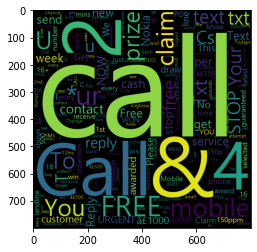

In [31]:
#spam
kon2 = []
for i in ssss[ssss['v1']=='spam']['v2'] :
    kon2 += i


wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(Counter(kon2))
plt.figure()
plt.imshow(gen)


In [ ]:
# 공짜 밑 전화하라는 비중이 스팸이 훨씬 많다는 것을 확인할 수 있다